                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 3.800e+04
Date:                Thu, 11 Nov 2021   Prob (F-statistic):          2.55e-182
Time:                        18:46:30   Log-Likelihood:                -1700.1
No. Observations:                 152   AIC:                             3404.
Df Residuals:                     150   BIC:                             3410.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7696.6871   2339.432     -3.290      0.0

Text(0.5, 1.0, 'Simple regresssion for 2008_pop_total and 2013_pop_total')

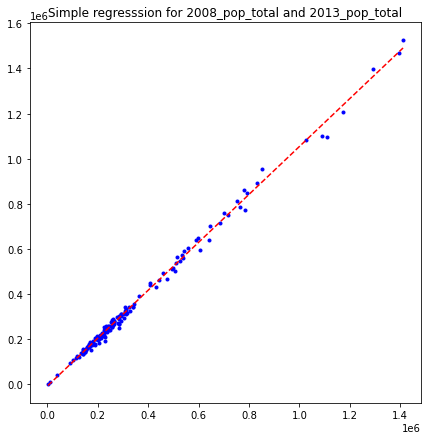

In [13]:
# This program performs a linear regression from data stored in a csv file,
# plots a scatter plot with line of best fit and saves it as a png image.

# The data file must be two columns of numbers, the x values and y values - no column labels, etc.
# It must be saved as a csv file (e.g. use "Save As" in Excel and choose csv format).
# It must be saved in the same folder as this program.
# See the file population_regression_data.csv for reference.

# In the next line, replace sample_boxplot_data.csv with the filename of your data:
data_filename = 'simple_regression.csv'

# In the next line, replace boxplot with the filename you wish to save as:
output_filename = 'regression_figure.png'

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 7,7

# You can ignore these two lines:
import matplotlib.pyplot as plt
import statsmodels.api as sms
import numpy as np

data = np.genfromtxt(data_filename,delimiter = ',')

# If there are errors importing the data, you can also copy the data in as a list.
# e.g. data = [1.95878982, 2.59203983, 1.22704688, ...]

# These lines extract the y-values and the x-values from the data:
x_values = data[:,0]
y_values = data[:,1]

# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# Uncomment these lines to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.savefig(output_filename)
plt.title('Simple regresssion for 2008_pop_total and 2013_pop_total')